#### Manipulação e Correção de Tipos de Dados
***

Um dos aspectos fundamentais no processamento de dados é garantir que os tipos de dados estejam corretos e adequados para as operações que serão realizadas. Uma má interpretação dos tipos de dados pode levar a resultados imprecisos ou inconsistentes em análises e modelos de dados.

Uma das principais razões pelas quais a manipulação e correção de tipos de dados é importante é porque diferentes tipos de dados têm comportamentos e propriedades específicas. Por exemplo, os números inteiros são tratados de forma diferente dos números de ponto flutuante, e as datas e horários têm suas próprias peculiaridades de manipulação e cálculo. Ao garantir que os tipos de dados sejam corretamente interpretados, podemos realizar operações matemáticas, filtros e comparações com precisão.

#### Importando as Bibliotecas


In [53]:
import pandas as pd

#### Coletando Dados de Perfil
***

In [94]:
df = pd.read_csv('./datasets/perfil_clientes.csv' , sep=';', encoding='utf8')
df.head()

,idade,classe_trabalho,escolaridade,anos_estudo,estado_civil,raca,sexo,UF,região,qtde_filhos,salario
0,39,Servidor Público,Ensino Médio Completo,13,Solteiro,Branco,Masculino,RO,Norte,2.0,"4754,50"
1,50,Autônomo,Superior Incompleto,13,Casado,Branco,Masculino,AC,Norte,1.0,3923
2,38,Funcionário Setor Privado,Ensino Médio Incompleto,9,Divorciado,Branco,Masculino,AM,Norte,0.0,"1100,50"
3,53,Funcionário Setor Privado,Ensino Médio Incompleto,7,Casado,Negro,Masculino,RR,Norte,1.0,1100
4,28,Funcionário Setor Privado,Ensino Médio Completo,13,Casado,Negro,Feminino,PA,Norte,0.0,3430


#### Entendimento Inicial dos Dados
***
É necessário analisar os dados para entender a estrutura, identificar variáveis, e verificar possíveis problemas.

In [95]:
df.tail()

,idade,classe_trabalho,escolaridade,anos_estudo,estado_civil,raca,sexo,UF,região,qtde_filhos,salario
7994,23,Funcionário Setor Privado,Ensino Médio Completo,10,Casado,Negro,Masculino,AL,Nordeste,3.0,2856
7995,19,Funcionário Setor Privado,Ensino Médio Incompleto,9,Solteiro,Branco,Feminino,SE,Nordeste,1.0,1100
7996,44,NaN,Ensino Médio Completo,10,Casado,Branco,Masculino,BA,Nordeste,0.0,3729
7997,20,Funcionário Setor Privado,Ensino Médio Incompleto,9,Solteiro,Negro,Masculino,MG,Sudeste,0.0,1100
7998,41,Funcionário Setor Privado,Ensino Médio Completo,13,Casado,Branco,Masculino,AP,Norte,1.0,2579


In [96]:
#deve-se avaliar quais tips de dados apresentam alguma divergência em seu tipo, por exemplo: salalario está como inteiro, porém ele pode ser float
# outro ponto que deve-se observar dados faltantes, base tem 7999 registros e na coluna 'classe_trabalho' temos apenas 7612
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   idade            7999 non-null   int64  
 1   classe_trabalho  7612 non-null   object 
 2   escolaridade     7999 non-null   object 
 3   anos_estudo      7999 non-null   int64  
 4   estado_civil     7999 non-null   object 
 5   raca             7999 non-null   object 
 6   sexo             7999 non-null   object 
 7   UF               7999 non-null   object 
 8   região           7999 non-null   object 
 9   qtde_filhos      7997 non-null   float64
 10  salario          7999 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 687.5+ KB


In [97]:
#Describe -  sempre apresentra as variaveis categóricas
df.describe()

,idade,anos_estudo,qtde_filhos
count,7999.000000,7999.000000,7997.000000
mean,38.477060,10.067633,2.404902
std,13.568667,2.537797,1.704059
min,17.000000,1.000000,0.000000
25%,28.000000,9.000000,1.000000
50%,37.000000,10.000000,2.000000
75%,47.000000,12.000000,4.000000
max,90.000000,16.000000,5.000000


#### Corrigindo Tipo de Dados
***
Dados incorretamente tipados podem levar a erros nas análises. É essencial garantir que cada coluna de dados tenha o tipo correto.

In [98]:
#funcionalidade para corrigir algum dformati de dado, por exemplo, o salario é int, separado com ., porém na base temos registos com ',' deve-se corrigir o preenchmento do dado
df['salario'].str.replace(',' , '.')

0       4754.50
1          3923
2       1100.50
3          1100
4          3430
         ...   
7994       2856
7995       1100
7996       3729
7997       1100
7998       2579
Name: salario, Length: 7999, dtype: object

In [99]:
type(df['salario'])

pandas.core.series.Series

In [100]:
#como  campo salario é um series, podemos alterar o valor dados, porém o campo ainda não esta declarado com inteiro
#lembre-se: primeiro corrige o dado, depois o manipule
df['salario'] = df['salario'].str.replace(',' , '.')

In [101]:
#Aqui estou corrigindo a declaração do campo, tronando ele float
df['salario'] = df['salario'].astype('float')

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   idade            7999 non-null   int64  
 1   classe_trabalho  7612 non-null   object 
 2   escolaridade     7999 non-null   object 
 3   anos_estudo      7999 non-null   int64  
 4   estado_civil     7999 non-null   object 
 5   raca             7999 non-null   object 
 6   sexo             7999 non-null   object 
 7   UF               7999 non-null   object 
 8   região           7999 non-null   object 
 9   qtde_filhos      7997 non-null   float64
 10  salario          7999 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 687.5+ KB


#### Eliminação de Dados Duplicados
***
A presença de dados duplicados pode distorcer os resultados de análises e modelos. A eliminação de duplicatas é, portanto, uma etapa crucial.

In [41]:
#Identificando dados duplicados, devemos remove-los para não etreinarmos nossa ML de forma erronêa
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7994    False
7995     True
7996    False
7997    False
7998    False
Length: 7999, dtype: bool

In [42]:
filtro = df.duplicated()
df[filtro]

,idade,classe_trabalho,escolaridade,anos_estudo,estado_civil,raca,sexo,UF,região,qtde_filhos,salario
859,17,Menor Aprendiz,Ensino Médio Incompleto,7,Solteiro,Branco,Masculino,RR,Norte,0.0,1100.0
1369,54,Funcionário Setor Privado,Ensino Médio Incompleto,9,Casado,Branco,Masculino,RO,Norte,1.0,1100.0
1711,38,Funcionário Setor Privado,Ensino Médio Incompleto,9,Casado,Branco,Masculino,RJ,Sudeste,5.0,1100.0
2196,31,Funcionário Setor Privado,Ensino Médio Incompleto,9,Separado,Branco,Feminino,ES,Sudeste,4.0,1100.0
2252,25,Funcionário Setor Privado,Ensino Médio Incompleto,9,Solteiro,Branco,Masculino,SP,Sudeste,2.0,1100.0
...,...,...,...,...,...,...,...,...,...,...,...
7822,23,Funcionário Setor Privado,Ensino Médio Incompleto,9,Solteiro,Branco,Masculino,RR,Norte,1.0,1100.0
7853,36,Funcionário Setor Privado,Ensino Médio Incompleto,9,Casado,Branco,Masculino,MA,Nordeste,2.0,1100.0
7905,28,Funcionário Setor Privado,Ensino Médio Incompleto,9,Solteiro,Branco,Masculino,AP,Norte,4.0,1100.0
7910,29,Funcionário Setor Privado,Ensino Médio Incompleto,9,Casado,Branco,Masculino,RN,Nordeste,4.0,1100.0


In [43]:
filtro = df.duplicated()
len(df[filtro])

66

In [44]:
duplicado = df.duplicated().sum()


In [46]:
df = df.drop_duplicates(inplace=True)


In [47]:
df.duplicated().sum()

AttributeError: 'NoneType' object has no attribute 'duplicated'

#### Correção de Dados Ausentes
***
Dados ausentes podem afetar a integridade das análises. A correção desses dados pode ser feita de várias formas, como preenchimento com valores médios, exclusão de registros ou interpolação.

In [63]:
df.isna().sum()

idade                0
classe_trabalho    387
escolaridade         0
anos_estudo          0
estado_civil         0
raca                 0
sexo                 0
UF                   0
região               0
qtde_filhos          2
salario              0
dtype: int64

In [64]:
filtro = df['qtde_filhos'].isna()
index_dados_ausentes = df[filtro].index
df.loc[index_dados_ausentes]

,idade,classe_trabalho,escolaridade,anos_estudo,estado_civil,raca,sexo,UF,região,qtde_filhos,salario
12,23,Funcionário Setor Privado,Pós-Graduado,13,Solteiro,Branco,Feminino,PE,Nordeste,NaN,5316.0
20,40,Funcionário Setor Privado,Doutorado,16,Casado,Branco,Masculino,PR,Sul,NaN,12535.0


#### Correção de Dados Numericos

In [135]:
df['qtde_filhos'].median()

np.float64(2.0)

In [136]:
mediana_idades = df['qtde_filhos'].median()
print(mediana_idades)

2.0


<Axes: xlabel='qtde_filhos'>

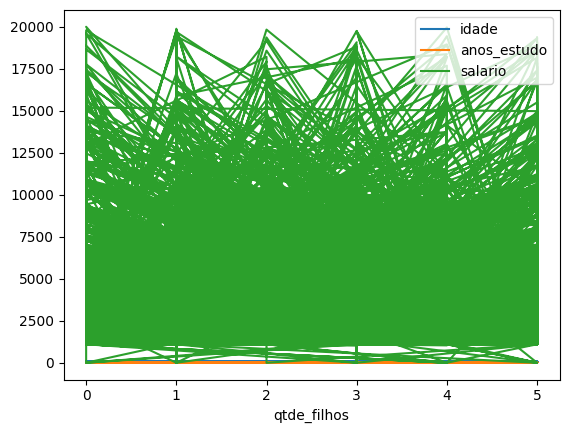

In [137]:
df.plot('qtde_filhos')

array([[<Axes: title={'center': 'qtde_filhos'}>]], dtype=object)

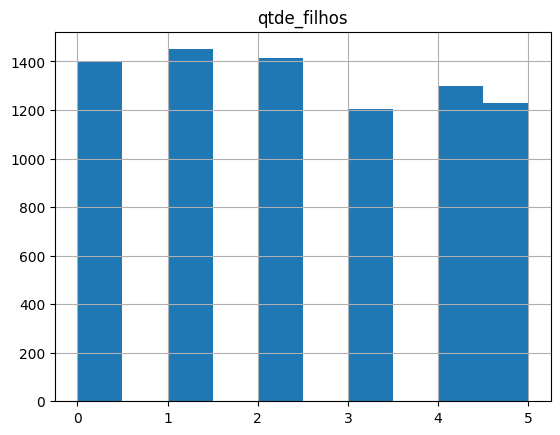

In [68]:
df.hist('qtde_filhos')

<Axes: >

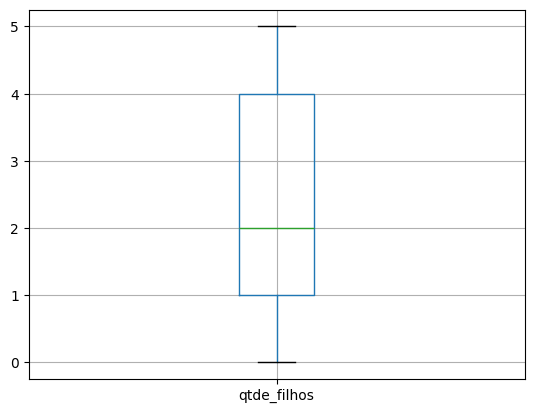

In [69]:
df['idadedf.boxplot('qtde_filhos')

Tratatando dados númercios, usando função mediana

In [138]:
mediana_idades = df['idade'].median()
print(mediana_idades)

37.0


In [139]:
df['idade'] = df['idade'].fillna(value= mediana_idades)

In [140]:
mediana_qtde_filhos = df['qtde_filhos'].median()
print(mediana_qtde_filhos)

2.0


In [141]:
df['qtde_filhos'] =df['qtde_filhos'].fillna(value=mediana_qtde_filhos)

In [142]:
df.isna().sum()

idade              0
classe_trabalho    0
escolaridade       0
anos_estudo        0
estado_civil       0
raca               0
sexo               0
UF                 0
região             0
qtde_filhos        0
salario            0
dtype: int64

In [84]:
df.loc[index_dados_ausentes]

,idade,classe_trabalho,escolaridade,anos_estudo,estado_civil,raca,sexo,UF,região,qtde_filhos,salario
12,23,Funcionário Setor Privado,Pós-Graduado,13,Solteiro,Branco,Feminino,PE,Nordeste,2.0,5316.0
20,40,Funcionário Setor Privado,Doutorado,16,Casado,Branco,Masculino,PR,Sul,2.0,12535.0


#Correção de Dados Categóricos / vamos trabalahr com a classe_trabalho

In [103]:
df['classe_trabalho'].value_counts()

classe_trabalho
Funcionário Setor Privado    5382
Autônomo                      588
Empresário                    496
Servidor Público              299
MEI                           275
Aposentado                    267
Funcionário Público           216
Menor Aprendiz                 85
Desempregado                    3
Estagiário                      1
Name: count, dtype: int64

In [104]:
df['classe_trabalho'].mode()

0    Funcionário Setor Privado
Name: classe_trabalho, dtype: object

In [105]:
df['classe_trabalho'].mode()[0]

'Funcionário Setor Privado'

In [106]:
moda = df['classe_trabalho'].mode()[0]
print(moda)

Funcionário Setor Privado


In [113]:
#A moda sçao funcionarios do setor privado, abaixo estamos gravando dados originais com seus index, para comparativo ápos alteração
filtro = df['classe_trabalho'].isna()
index_ausentes = df[filtro].index
df.loc[index_ausentes]

,idade,classe_trabalho,escolaridade,anos_estudo,estado_civil,raca,sexo,UF,região,qtde_filhos,salario
61,32,NaN,Ensino Fundamental Incompleto,4,União Estável,Branco,Masculino,MA,Nordeste,4.0,1100.0
69,25,NaN,Ensino Médio Completo,10,Solteiro,Branco,Masculino,BA,Nordeste,3.0,3450.0
127,35,NaN,Ensino Médio Incompleto,9,Casado,Amarelo,Masculino,PR,Sul,4.0,1100.0
148,43,NaN,Ensino Médio Completo,10,Divorciado,Branco,Feminino,SE,Nordeste,0.0,2490.0
153,52,NaN,Ensino Médio Incompleto,9,Divorciado,Branco,Masculino,SP,Sudeste,1.0,1100.0
...,...,...,...,...,...,...,...,...,...,...,...
7931,51,NaN,Ensino Médio Completo,10,Divorciado,Branco,Feminino,PA,Norte,2.0,2660.0
7952,19,NaN,Ensino Médio Completo,10,Solteiro,Branco,Feminino,GO,Centro-Oeste,0.0,2581.0
7960,30,NaN,Ensino Fundamental Completo,5,Solteiro,Branco,Feminino,TO,Norte,4.0,1100.0
7988,20,NaN,Ensino Médio Completo,10,Solteiro,Branco,Masculino,MA,Nordeste,2.0,3610.0


In [92]:
df['classe_trabalho']= df['classe_trabalho'].fillna(value=moda)

In [120]:
#Vamos criar um função para armazenar os index para comparativos e reaproveitamento do código

def verifica_dados_ausentes(dataframe, coluna):
    filtro = dataframe[coluna].isna()
    index_dados_ausentes = dataframe[filtro].index
    display(dataframe.loc[index_dados_ausentes])
    return index_dados_ausentes

In [128]:
index_ausente_classe_trabalho = verifica_dados_ausentes(dataframe = df , coluna ='classe_trabalho')
index_ausente_classe_trabalho

,idade,classe_trabalho,escolaridade,anos_estudo,estado_civil,raca,sexo,UF,região,qtde_filhos,salario


Index([], dtype='int64')

In [124]:
index_ausente_classe_trabalho = verifica_dados_ausentes(dataframe = df , coluna ='qtde_filhos')
index_ausente_classe_trabalho

,idade,classe_trabalho,escolaridade,anos_estudo,estado_civil,raca,sexo,UF,região,qtde_filhos,salario
12,23,Funcionário Setor Privado,Pós-Graduado,13,Solteiro,Branco,Feminino,PE,Nordeste,NaN,5316.0
20,40,Funcionário Setor Privado,Doutorado,16,Casado,Branco,Masculino,PR,Sul,NaN,12535.0


Index([12, 20], dtype='int64')

In [131]:
df['classe_trabalho'] = df['classe_trabalho'].fillna(value=moda)

In [132]:
df.loc[index_ausente_classe_trabalho]

,idade,classe_trabalho,escolaridade,anos_estudo,estado_civil,raca,sexo,UF,região,qtde_filhos,salario


In [143]:
df.isna().sum()

idade              0
classe_trabalho    0
escolaridade       0
anos_estudo        0
estado_civil       0
raca               0
sexo               0
UF                 0
região             0
qtde_filhos        0
salario            0
dtype: int64

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   idade            7999 non-null   int64  
 1   classe_trabalho  7999 non-null   object 
 2   escolaridade     7999 non-null   object 
 3   anos_estudo      7999 non-null   int64  
 4   estado_civil     7999 non-null   object 
 5   raca             7999 non-null   object 
 6   sexo             7999 non-null   object 
 7   UF               7999 non-null   object 
 8   região           7999 non-null   object 
 9   qtde_filhos      7999 non-null   float64
 10  salario          7999 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 687.5+ KB


In [146]:
#Agora que não temos dados zerados, podemos tratar o tipo do dado da coluna'qtde_filhos' que era float para inteiro

df['qtde_filhos'] = df['qtde_filhos'].astype('int')

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   idade            7999 non-null   int64  
 1   classe_trabalho  7999 non-null   object 
 2   escolaridade     7999 non-null   object 
 3   anos_estudo      7999 non-null   int64  
 4   estado_civil     7999 non-null   object 
 5   raca             7999 non-null   object 
 6   sexo             7999 non-null   object 
 7   UF               7999 non-null   object 
 8   região           7999 non-null   object 
 9   qtde_filhos      7999 non-null   int64  
 10  salario          7999 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 687.5+ KB
